In [39]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error

# --- CONFIGURARE STIL ---
sns.set_context("notebook", font_scale=1.2)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14

HOUSES = ['House1', 'House2']
print("Biblioteci incarcate. Stil configurat.")

Biblioteci incarcate. Stil configurat.


In [40]:
results_data = []

print("Incarcare rezultate...", end=" ")

for house in HOUSES:
    filename = f'results_{house}.pkl'
    try:
        with open(filename, 'rb') as f:
            data = pickle.load(f)
            
        y_true = data['y_true']
        preds = data['rezultate']
        times = data['timpi']
        
        for model_name, y_pred in preds.items():
            # Asiguram ca dimensiunile coincid
            if len(y_pred) != len(y_true):
                min_len = min(len(y_pred), len(y_true))
                y_pred = y_pred[:min_len]
                y_true_cut = y_true[:min_len]
            else:
                y_true_cut = y_true
                
            # Calcul Metrici
            mae = mean_absolute_error(y_true_cut, y_pred)
            rmse = np.sqrt(mean_squared_error(y_true_cut, y_pred))
            time_sec = times.get(model_name, 0)
            results_data.append({
                'Casa': house,
                'Model': model_name,
                'MAE (W)': mae,
                'RMSE': rmse,
                'Timp (s)': time_sec
            })
            
    except FileNotFoundError:
        print(f"\n[ATENTIE] Fisierul {filename} lipseste! Asigura-te ca ai rulat Notebook-ul 2.")

# Creare DataFrame
df_results = pd.DataFrame(results_data)
print("GATA!")


Incarcare rezultate... GATA!


In [41]:
# Sortam dupa Performanta Generala (Media MAE intre case)
order = df_results.groupby('Model')['MAE (W)'].mean().sort_values().index

print("\n" + "="*80)
print(f"=== CLASAMENT FINAL DETALIAT (Sortat dupa MAE) ===")
print("="*80)

# Formatare tabel pentru printare ca in poza ta
print(f"{'CASA':<10} | {'MODEL':<12} | {'MAE (W)':<10} | {'RMSE':<10} | {'TIMP (s)':<10}")
print("-" * 65)

for house in HOUSES:
    df_house = df_results[df_results['Casa'] == house].sort_values('MAE (W)')
    for _, row in df_house.iterrows():
        print(f"{row['Casa']:<10} | {row['Model']:<12} | {row['MAE (W)']:<10.2f} | {row['RMSE']:<10.2f} | {row['Timp (s)']:<10.1f}")
    print("-" * 65)




=== CLASAMENT FINAL DETALIAT (Sortat dupa MAE) ===
CASA       | MODEL        | MAE (W)    | RMSE       | TIMP (s)  
-----------------------------------------------------------------
House1     | LightGBM     | 151.90     | 236.52     | 0.8       
House1     | XGBoost      | 175.36     | 320.83     | 0.6       
House1     | LSTM         | 192.87     | 315.38     | 62.5      
House1     | GRU          | 195.41     | 325.10     | 67.3      
House1     | RNN          | 221.31     | 340.33     | 7.3       
House1     | Prophet      | 326.25     | 381.18     | 2.3       
-----------------------------------------------------------------
House2     | LightGBM     | 149.25     | 264.16     | 0.8       
House2     | XGBoost      | 154.15     | 275.12     | 0.5       
House2     | GRU          | 230.50     | 411.68     | 72.4      
House2     | LSTM         | 237.20     | 434.37     | 63.5      
House2     | RNN          | 302.47     | 477.16     | 8.2       
House2     | Prophet      | 340.83  

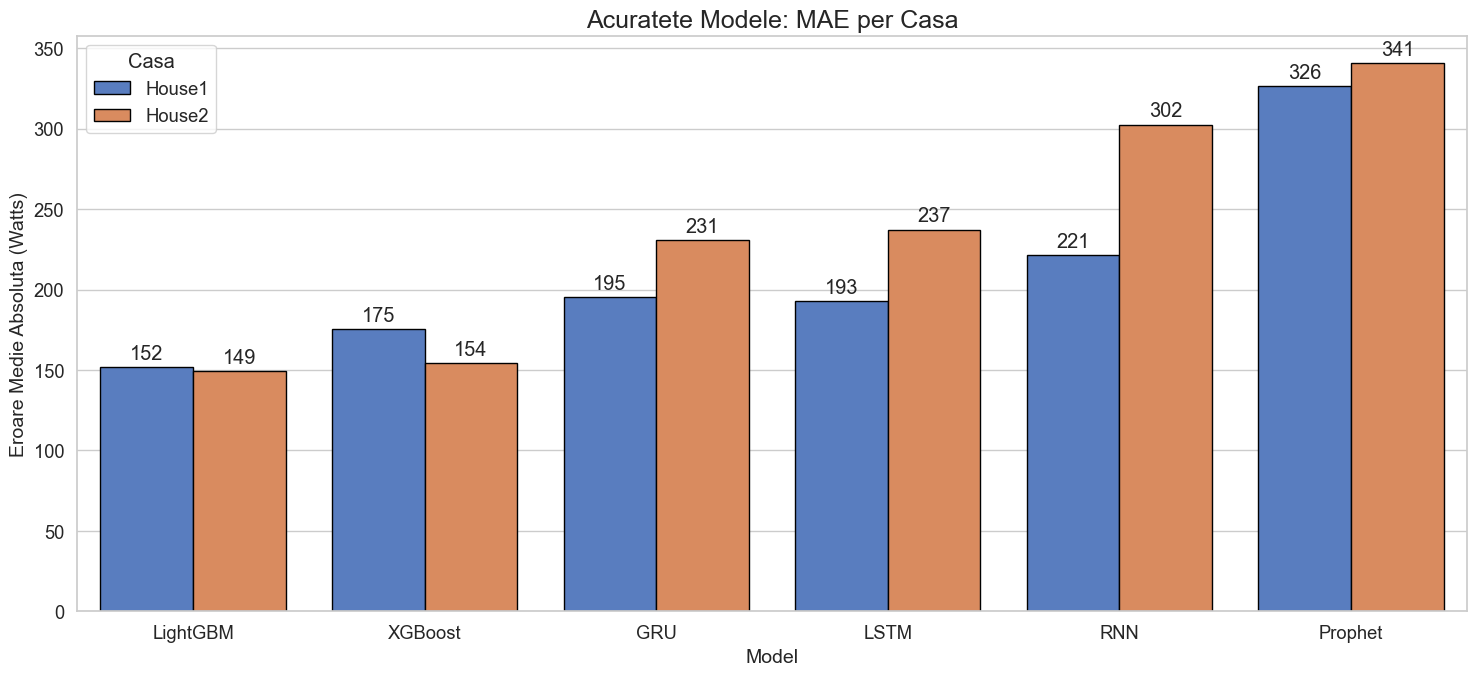

In [42]:
plt.figure(figsize=(15, 7))

# Barplot grupat
ax = sns.barplot(x='Model', y='MAE (W)', hue='Casa', data=df_results, 
                 order=order, palette='muted', edgecolor='black')

plt.title('Acuratete Modele: MAE per Casa', fontsize=18)
plt.ylabel('Eroare Medie Absoluta (Watts)', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.legend(title='Casa', loc='upper left')

# Adaugam valori pe bare
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3)

plt.tight_layout()
plt.show()

In [43]:
import pandas as pd

# 1. Incarcam datele reale pentru a afla MEDIA consumului
try:
    df1 = pd.read_csv('CLEAN_House1.csv')
    df2 = pd.read_csv('CLEAN_House2.csv')

    mean_h1 = df1['Aggregate'].mean()
    mean_h2 = df2['Aggregate'].mean()

except FileNotFoundError:
    print("Nu gasesc fisierele CSV! Asigura-te ca sunt in folder.")

# 2. Introducem valorile tale obtinute (Best Models)

# A. Pentru HOUSE 1
# 1. Filtram doar House1
best_h1 = df_results[df_results['Casa'] == 'House1'].sort_values(by='MAE (W)').iloc[0]
model_h1_name = best_h1['Model']
mae_h1 = best_h1['MAE (W)']
rmse_h1 = best_h1['RMSE']

# B. Pentru HOUSE 2 
# 2. Filtram doar House2
best_h2 = df_results[df_results['Casa'] == 'House2'].sort_values(by='MAE (W)').iloc[0]
model_h2_name = best_h2['Model']
mae_h2 = best_h2['MAE (W)']
rmse_h2 = best_h2['RMSE']

# 3. Calculam procentele
mae_perc_h1 = (mae_h1 / mean_h1) * 100
rmse_perc_h1 = (rmse_h1 / mean_h1) * 100

mae_perc_h2 = (mae_h2 / mean_h2) * 100
rmse_perc_h2 = (rmse_h2 / mean_h2) * 100

# 4. Afisare Raport 
print(f"=== RAPORT PROCENTUAL EROARE ===")

print(f"\n--- HOUSE 1 (Consum Mediu: {mean_h1:.2f} W) ---")
print(f"Model: XGBoost")
print(f"MAE Relativ:  {mae_perc_h1:.2f}%  <-- (Cat greseste modelul in medie)")
print(f"RMSE Relativ: {rmse_perc_h1:.2f}% <-- (Cat greseste modelul la varfuri/spikes)")

print(f"\n--- HOUSE 2 (Consum Mediu: {mean_h2:.2f} W) ---")
print(f"Model: LightGBM")
print(f"MAE Relativ:  {mae_perc_h2:.2f}%")
print(f"RMSE Relativ: {rmse_perc_h2:.2f}%")




=== RAPORT PROCENTUAL EROARE ===

--- HOUSE 1 (Consum Mediu: 481.14 W) ---
Model: XGBoost
MAE Relativ:  31.57%  <-- (Cat greseste modelul in medie)
RMSE Relativ: 49.16% <-- (Cat greseste modelul la varfuri/spikes)

--- HOUSE 2 (Consum Mediu: 465.10 W) ---
Model: LightGBM
MAE Relativ:  32.09%
RMSE Relativ: 56.80%
